<div class="alert alert-block alert-success">
<center> <h1> Trabalho Data Science - Universidade País da Maravilhas </h1> </center> <br>
<center> <h2> Tópicos em Engenharia de Dados </h2> </center> <br>
<center><h3> Docente: Bruno Cipriano @ Universidade Lusófona</h3> </center><br>
<center><h3> Discente:
João Eleutério a22308295</h3> </center><br>
<center> 2023/2024 </center>

# Índice

* [1. Inicial](#inicio)
    * [1.1. Imports](#imports)
    * [1.2. Funções](#functions)
* [2. Primeira Fase](#fase1)
* [3. Segunda Fase](#parte2)
* [4. Extra](#extra)


<hr>
<h1><a class="anchor" id="inicial">1.  Inicial</a></h1>

<hr>
<h2><a class="anchor" id="imports">1.1.  Imports</a></h2>

In [43]:
#!pip install mysql-connector-python
#!pip install pandas
#!pip install matplotlib
#!pip install numpy
#!pip install seaborn

import mysql.connector
import csv
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


<hr>
<h2><a class="anchor" id="functions">1.2.  Funções</a></h2>

In [44]:
# Funcao que cria ficheiro
def create_file(name_file,data):
    with open(name_file, mode='w', newline='', encoding='utf-8') as f:
        f.write(data)

# Funcao que analisa a linha e diz se e invalida ou nao
def Invalid_data(line):
    return (line['media_entrada'] < 10 or
            line['media_entrada'] > 20 or
            line['media_final'] < 10 or
            line['media_final'] > 20 or
            np.isnan(line['media_final']) or
            line['curso_concluido'] == 0 or
            line['curso'] is None or
            line['curso'] not in ('Informática','Psicologia','Comunicação'))
        

def create_scatterplot(x, y, xlabel, ylabel,title):
    correlation =x.corr(y)
    plt.scatter(x, y)
     
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
             (np.unique(x)), color='red')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Funcao que imprime os valores unicos da coluna
def imprimir_valores_unicos(df,coluna):
    valores_unicos = df[coluna].unique()
    
    valores_nao_nan = sorted([val for val in valores_unicos if pd.notna(val)])
    valores_nan = [val for val in valores_unicos if pd.isna(val)]

    valores_unicos_ordenados = valores_nao_nan + valores_nan

    # Imprime os valores unicos da coluna
    print(f'Os valores da coluna {coluna} sao: {", ".join([str(val) for val in valores_unicos_ordenados])}.\n')

# Funcao que imprime a quantidade de linhas que a coluna tem NaN
def imprimir_quantidade_linhas_com_valores(df,coluna):
    # Imprimir a quantidade de valores nao NaN da coluna
    print(f'Existem {df[coluna].count()} linhas com valores nao NaN de {len(df[coluna])} linhas na coluna {coluna}.')

# Funcao que imprime o top 5 e o bottom 5 da coluna
def imprimir_top(df,coluna):
    dicionario = df[coluna].value_counts().to_dict()
    
    # Ordenar o dicionario para obter os valores mais usados
    lista = sorted(dicionario.items(), key=lambda x: x[1], reverse=True)
    
    print(f'{coluna} com mais aparições é: {lista[0][0]}, {lista[0][1]}.')
    print(f"O top 5 {coluna}:")
    df_top = pd.DataFrame(lista[:5], columns=[coluna, 'Number'])
    print(f'{df_top}\n')
    
    if len(lista) > 5:
        print(f"\nO bottom 5 {coluna}:")
        bottom_5 = [(str(item[0]), item[1]) for item in sorted(lista, key=lambda x: x[1])[:5]]
        df_bottom = pd.DataFrame(bottom_5, columns=[coluna, 'Number'])
        print(f'{df_bottom}\n')





def create_heatmap(corr, title ):
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(title)
    plt.show()



def create_boxplots(df, qnt_por_linha = 4):
    numeric_columns = df.select_dtypes(['int64','float64']).columns

    # Calculando o numero de subplots necessarios
    num_subplots = len(numeric_columns)
    
    # Definindo o numero de linhas e colunas com base no numero de subplots
    num_linhas = (num_subplots - 1) // qnt_por_linha + 1
    num_colunas = min(num_subplots, qnt_por_linha)
    
    # Criando boxplots para cada coluna numerica
    plt.figure(figsize=(10, 3 * num_linhas))
    
    # Iterar sobre as colunas numericas
    for i, coluna in enumerate(numeric_columns, 1):
        plt.subplot(num_linhas, num_colunas, i)
        
        # Criando um boxplot sem criar uma coluna adicional para outliers
        sns.boxplot(data=df, y=coluna)
        
        # Calcular o primeiro e terceiro quartis para a coluna
        q1 = df[coluna].quantile(0.25)
        q3 = df[coluna].quantile(0.75)
        
        # Calcular o intervalo interquartil (IQR) para a coluna
        iqr = q3 - q1
        
        # Definir limites para identificar outliers para a coluna
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Identificar outliers para a coluna
        outliers = (df[coluna] < lower_bound) | (df[coluna] > upper_bound)
        plt.title(f'Boxplot - {coluna}')
    
    
    # Ajuste do layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

<hr>
<h1><a class="anchor" id="fase1">2.  Primeira Fase</a></h1>

In [45]:
# Conexao com a base de dados
conn = mysql.connector.connect(
    host="127.0.0.1", 
    user="root",
    password="",
    database="projetoengenhariadados"
)
df = pd.read_sql_query("SELECT * FROM aluno", conn)

C:\Users\joaop\AppData\Local\Temp\ipykernel_29376\1420564172.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM aluno", conn)


In [46]:
# Iterando sobre as linhas do DataFrame e imprimindo se os dados são inválidos
invalid_data = ""
valid_data = ""
column_names = "nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final"
for i, row in df.iterrows():
    
    data_line = f"{row['nr_aluno']}, {row['nome']}, {row['apelido']}, {row['curso']}, {row['media_entrada']}, {row['curso_concluido']}, {row['media_final']}\n"
    
    if Invalid_data(row):
        invalid_data += data_line
    else:
        valid_data += data_line


no_course_completed_data = ""
for i, row in df.iterrows():
    if row['curso_concluido'] == 0:
        no_course_completed_data += f"{row['nr_aluno']}, {row['nome']}, {row['apelido']}, {row['curso']}, {row['media_entrada']}, {row['curso_concluido']}, {row['media_final']}\n"


In [47]:
# Escrever ficheiro de texto com dados invalidos
create_file('fase1-InvalidData.txt',f'{column_names}\n{invalid_data}')

In [48]:
# Escrever ficheiro de texto com dados validos
create_file('fase1-ValidData.csv',f'{column_names}\n{valid_data}')

In [49]:
# Escrever ficheiro de texto com dados que nao tenham curso concluido
create_file('fase1-InvalidDataNoCourseCompleted.txt',f"{column_names}\n{no_course_completed_data}")

In [50]:
# criar dataframe
df = pd.read_csv('fase1-ValidData.csv')

In [51]:
# Resumos estatisticos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
nr_aluno,1717.0,7.045000e+07,3.251712e+08,20216.0,2019521.0,2022554.0,20201365.0,2.022174e+09
media_entrada,1717.0,1.507863e+01,3.225986e+00,10.0,12.0,15.0,18.0,2.000000e+01
curso_concluido,1717.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.000000e+00
media_final,1717.0,1.493652e+01,3.225958e+00,10.0,12.0,15.0,18.0,2.000000e+01


In [52]:
for col in df.columns:
    imprimir_quantidade_linhas_com_valores(df,col)
    if(col not in 'nr_aluno'):
        imprimir_valores_unicos(df,col)
    imprimir_top(df,col)

Existem 1717 linhas com valores nao NaN de 1717 linhas na coluna nr_aluno.
nr_aluno com mais aparições é: 20216, 1.
O top 5 nr_aluno:
   nr_aluno  Number
0     20216       1
1  20191199       1
2  20191197       1
3  20191194       1
4  20191183       1


O bottom 5 nr_aluno:
   nr_aluno  Number
0     20216       1
1  20191199       1
2  20191197       1
3  20191194       1
4  20191183       1

Existem 1717 linhas com valores nao NaN de 1717 linhas na coluna nome.
Os valores da coluna nome sao:  Alice,  Ana,  Anakin Skywalker,  Anne,  Avelino,  Beatriz,  Bruno,  Carla,  Catarina,  Christos,  Diana,  Joana,  Jorge,  Leonardo,  Lucas,  Luke,  Maria,  Maria João,  Marta,  Michaelangelo,  Miguel,  Nuno,  Olivia,  Patrícia,  Pedro,  Raquel,  Rita,  Rodrigo,  Rui,  Sandra,  Thomas Anderson.

nome com mais aparições é:  Rita, 114.
O top 5 nome:
       nome  Number
0      Rita     114
1   Avelino      78
2   Rodrigo      78
3     Jorge      76
4     Pedro      75


O bottom 5 nome:
           

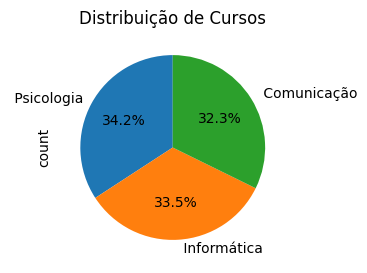

In [53]:
# Contar a frequência de cada curso
curso_counts = df['curso'].value_counts()
curso_counts.plot.pie(autopct='%1.1f%%', figsize=(5, 3), startangle=90)
plt.title('Distribuição de Cursos')
plt.show()

Text(0.5, 0.98, 'Histogramas das Médias')

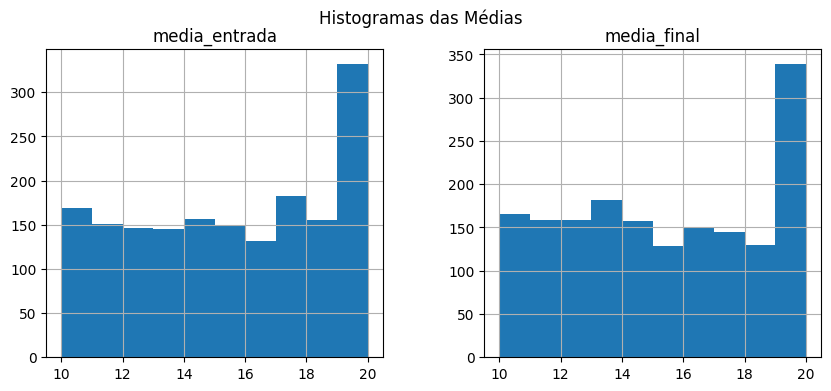

In [54]:
df.hist(column=['media_entrada', 'media_final'], bins=10, figsize=(10, 4))
plt.suptitle('Histogramas das Médias')

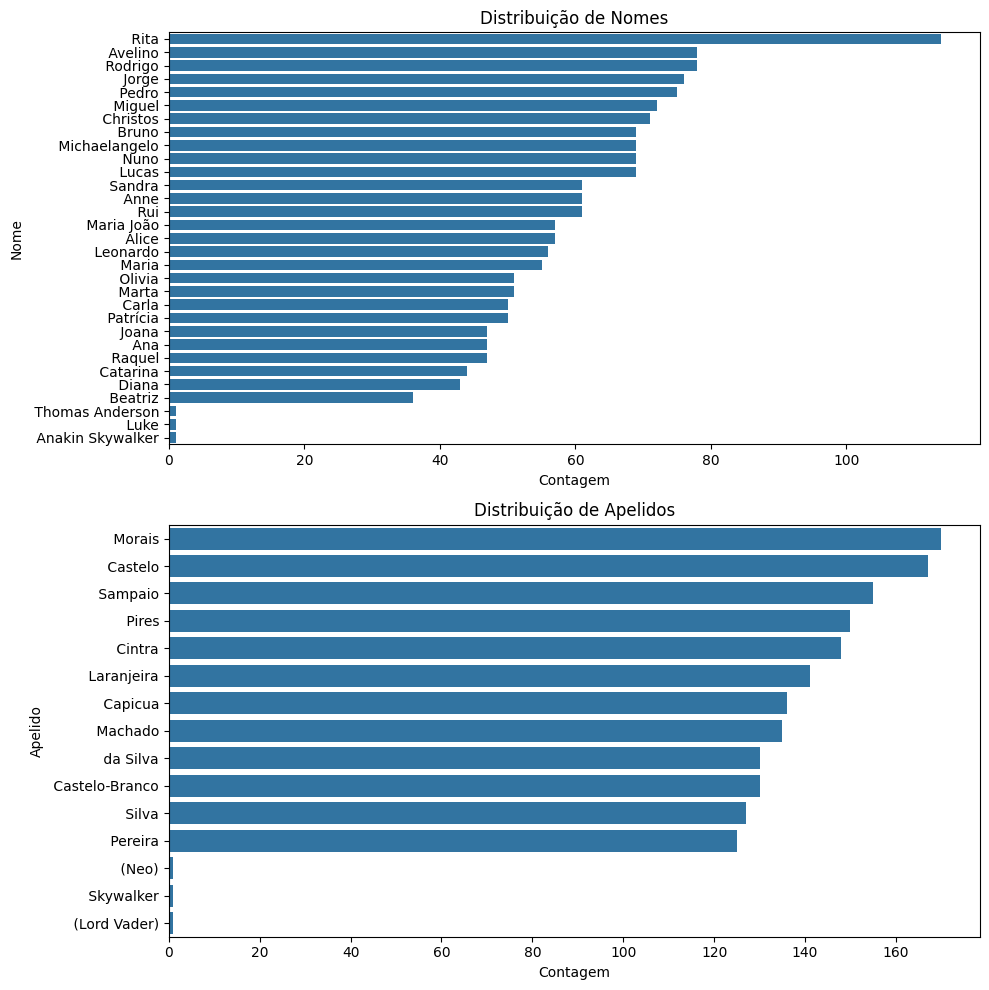

In [55]:
nome_counts = df['nome'].value_counts().sort_values(ascending=False)
apelido_counts = df['apelido'].value_counts().sort_values(ascending=False)

# Configurar o tamanho da figura com dois subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

sns.barplot(x=nome_counts.values, y=nome_counts.index, ax=axes[0], order=nome_counts.index)
axes[0].set_title('Distribuição de Nomes')
axes[0].set_xlabel('Contagem')
axes[0].set_ylabel('Nome')

sns.barplot(x=apelido_counts.values, y=apelido_counts.index, ax=axes[1], order = apelido_counts.index)
axes[1].set_title('Distribuição de Apelidos')
axes[1].set_xlabel('Contagem')
axes[1].set_ylabel('Apelido')

# Ajustar layout e mostrar gráfico
plt.tight_layout()
plt.show()

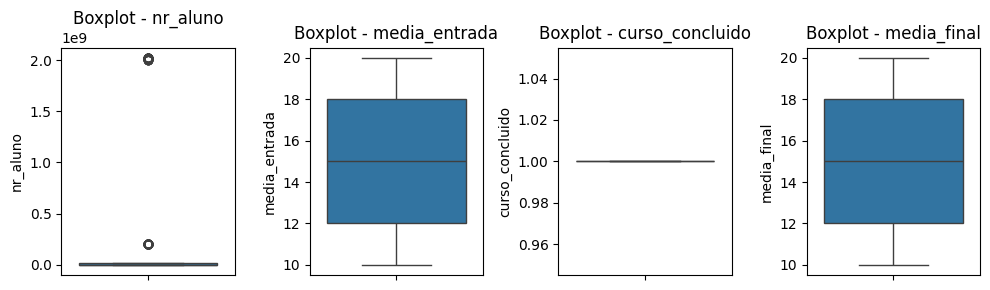

In [56]:
# Cria e mostra os boxplots para vermos outliers
create_boxplots(df)

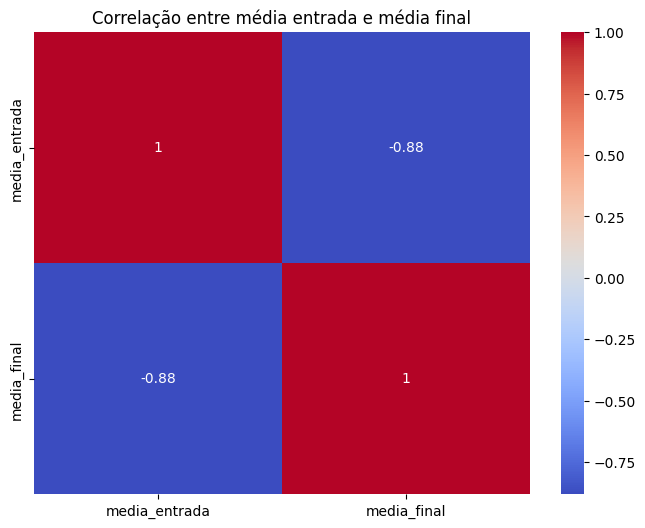

In [57]:
# Correlacao de media de entrada e media final
create_heatmap(df[['media_entrada','media_final']].corr(), 'Correlação entre média entrada e média final')

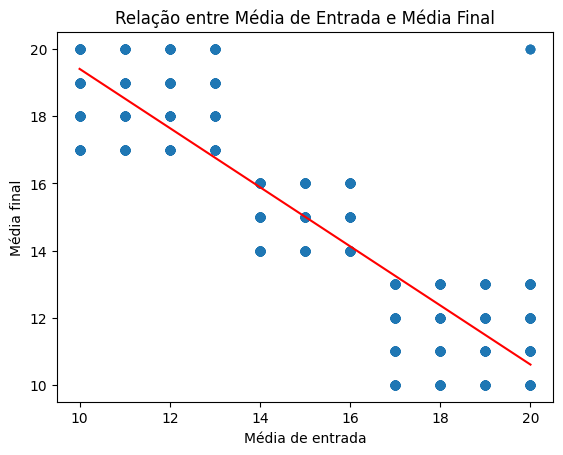

In [58]:
# Scatterplot que mostra os valores e a correlacao em vermelho
create_scatterplot(df['media_entrada'],df['media_final'],'Média de entrada','Média final','Relação entre Média de Entrada e Média Final')

In [59]:
# Achar valores do ponto distante
df[(df['media_final'] > 18) & (df['media_entrada'] > 18) ]

,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
911,2210000,Thomas Anderson,(Neo),Informática,20,1,20.0
912,2210100,Luke,Skywalker,Comunicação,20,1,20.0
913,2290110,Anakin Skywalker,(Lord Vader),Psicologia,20,1,20.0


<hr>
<h1><a class="anchor" id="fase2">3.  Segunda Fase</a></h1>

In [60]:
# Leitura do novo ficheiro
dataframeFase2 = pd.read_csv('dados_origem_alunos.csv')

In [61]:
# ver que dados tem
dataframeFase2

,NR_ALUNO,CURSO_ORIGEM
0,20216,Profissional
1,200315,Geral
2,200321,Profissional
3,200326,Profissional
4,200332,Profissional
...,...,...
1733,2022146725,Profissional
1734,2022150947,Geral
1735,2022165143,Geral
1736,2022165224,Geral


In [62]:
# colocar os nomes das colunas bem
dataframeFase2.columns = ['nr_aluno','curso_origem']

In [63]:
# merge dos dataframes pelo nr_aluno em que e left pois queremos todos os alunos mesmo que nao tenham o nr_aluno no novo dataframe
df_final_1 = df.merge(dataframeFase2, on='nr_aluno',how='left')
df_final_1

,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final,curso_origem
0,20216,Joana,Castelo,Comunicação,20,1,12.0,Profissional
1,200315,Anne,Morais,Psicologia,14,1,16.0,Geral
2,200321,Pedro,Castelo,Informática,10,1,19.0,Profissional
3,200326,Patrícia,da Silva,Psicologia,20,1,10.0,Profissional
4,200331,Beatriz,Castelo,Comunicação,19,1,12.0,NaN
...,...,...,...,...,...,...,...,...
1712,2022146725,Rita,Cintra,Psicologia,15,1,16.0,Profissional
1713,2022150947,Christos,Machado,Psicologia,18,1,10.0,Geral
1714,2022165143,Pedro,Pires,Informática,14,1,16.0,Geral
1715,2022165224,Jorge,Pires,Psicologia,10,1,20.0,Geral


In [64]:

df_final_1[df_final_1['curso_origem'].isna()]

,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final,curso_origem
4,200331,Beatriz,Castelo,Comunicação,19,1,12.0,NaN
27,200755,Raquel,Castelo,Comunicação,14,1,16.0,NaN
39,201937,Pedro,Pereira,Informática,18,1,11.0,NaN
46,201974,Beatriz,Capicua,Comunicação,19,1,10.0,NaN
49,201985,Ana,da Silva,Comunicação,17,1,13.0,NaN
56,202035,Michaelangelo,Laranjeira,Informática,17,1,12.0,NaN
74,202147,Maria João,Cintra,Informática,20,1,12.0,NaN
86,202219,Christos,Machado,Comunicação,20,1,11.0,NaN
91,202247,Olivia,Pires,Informática,12,1,20.0,NaN
93,202279,Marta,da Silva,Comunicação,20,1,11.0,NaN


In [65]:
# Algumas informacoes sobre a nova coluna
imprimir_quantidade_linhas_com_valores(df_final_1,'curso_origem')
imprimir_valores_unicos(df_final_1,'curso_origem')
imprimir_top(df_final_1,'curso_origem')

Existem 1697 linhas com valores nao NaN de 1717 linhas na coluna curso_origem.
Os valores da coluna curso_origem sao: Geral, Profissional, nan.

curso_origem com mais aparições é: Geral, 1100.
O top 5 curso_origem:
   curso_origem  Number
0         Geral    1100
1  Profissional     597



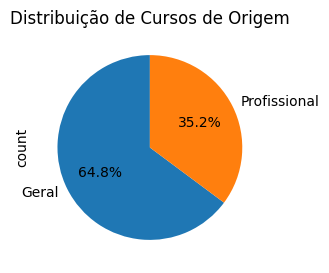

In [66]:
# Contar a frequência de cada curso
curso_counts = df_final_1['curso_origem'].value_counts()
curso_counts.plot.pie(autopct='%1.1f%%', figsize=(5, 3), startangle=90)
plt.title('Distribuição de Cursos de Origem')
plt.show()

In [67]:
# Duas alternativas para responder a pergunta
# Converter para numero para poder fazer correlacao
df_final_2 = df_final_1.copy()
df_final_1.loc[df_final_1['curso_origem'] == 'Profissional', 'profissional'] = 1
df_final_1.loc[df_final_1['curso_origem'] != 'Profissional', 'profissional'] = 0

df_final_1.loc[df_final_1['curso_origem'] == 'Geral', 'geral'] = 1
df_final_1.loc[df_final_1['curso_origem'] != 'Geral', 'geral'] = 0

df_final_2.loc[df_final_2['curso_origem'] == 'Profissional', 'curso_origem_nr'] = 1
df_final_2.loc[df_final_2['curso_origem'] != 'Profissional', 'curso_origem_nr'] = 0

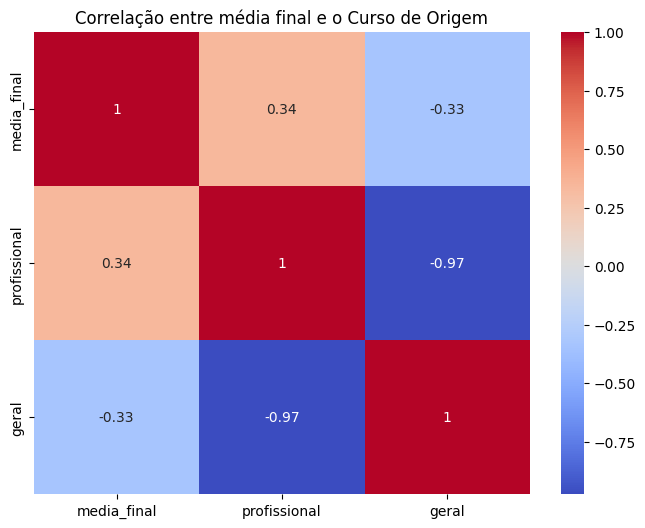

In [68]:
# Correlacao entre a media final e os dois cursos de origem
create_heatmap(df_final_1[['media_final','profissional','geral']].corr(), 'Correlação entre média final e o Curso de Origem')

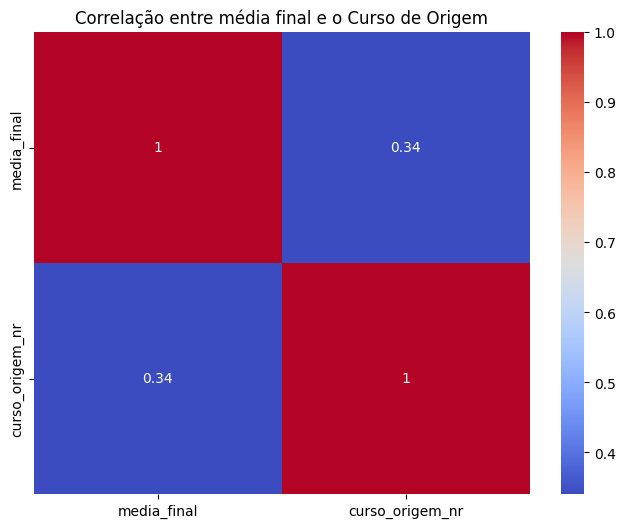

In [69]:
# Correlacao entre a media final e os dois cursos de origem
create_heatmap(df_final_2[['media_final','curso_origem_nr']].corr(), 'Correlação entre média final e o Curso de Origem')

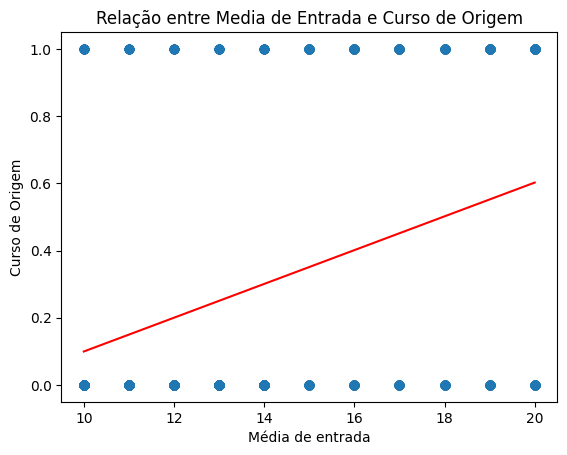

In [70]:
# Scatterplot que mostra os valores e a correlacao em vermelho
create_scatterplot(df_final_2['media_final'],df_final_2['curso_origem_nr'],'Média de entrada','Curso de Origem','Relação entre Media de Entrada e Curso de Origem')

In [71]:
# Filtrar pelo curso de ensino geral e contar quantos tem em cada nota final
contagem_notas = df_final_2[df_final_2['curso_origem_nr'] == 0]['media_final'].value_counts()

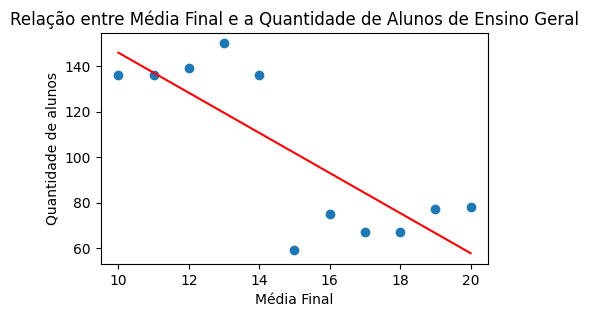

In [72]:
# Criar e mostrar o grafico
plt.figure(figsize=(5, 3))
plt.plot(np.unique(contagem_notas.index), np.poly1d(np.polyfit(contagem_notas.index,  contagem_notas.values, 1))
         (np.unique(contagem_notas.index)), color='red')
plt.title('Relação entre Média Final e a Quantidade de Alunos de Ensino Geral')
plt.xlabel('Média Final')
plt.ylabel('Quantidade de alunos')
plt.scatter(contagem_notas.index, contagem_notas.values)
plt.show()


In [73]:
# Filtrar pelo curso de ensino profissional e contar quantos tem em cada nota final
contagem_notas = df_final_2[df_final_2['curso_origem_nr'] == 1]['media_final'].value_counts().sort_index()

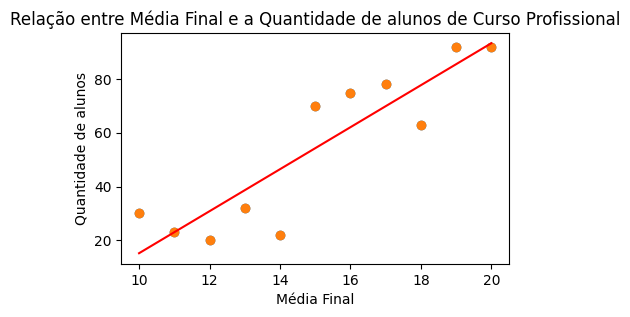

In [74]:
# Criar e mostrar o grafico
plt.figure(figsize=(5, 3))
plt.scatter(contagem_notas.index, contagem_notas.values)
plt.plot(np.unique(contagem_notas.index), np.poly1d(np.polyfit(contagem_notas.index,  contagem_notas.values, 1))
         (np.unique(contagem_notas.index)), color='red')

plt.title('Relação entre Média Final e a Quantidade de alunos de Curso Profissional')
plt.xlabel('Média Final')
plt.ylabel('Quantidade de alunos')
plt.scatter(contagem_notas.index, contagem_notas.values)
plt.show()

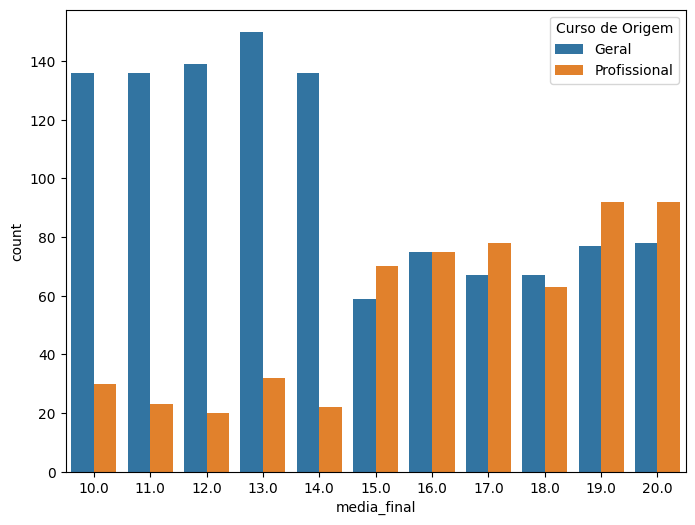

In [75]:
# Criar e mostrar o grafico de barras agrupadas
plt.figure(figsize=(8, 6))
sns.countplot(data=df_final_2, x='media_final', hue='curso_origem_nr')
plt.legend(title='Curso de Origem', labels=['Geral', 'Profissional'])
plt.show()

<hr>
<h1><a class="anchor" id="extra">4.  Extra</a></h1>

Vamos observar os que não foi usado

In [76]:
# Leitura do ficheiro
df_curso = pd.read_csv('fase1-InvalidDataNoCourseCompleted.txt')
df_curso

,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
0,200722,Catarina,da Silva,Psicologia,13,0,nan
1,200739,Alice,Pires,Psicologia,17,0,nan
2,2003485,Alice,Pires,Psicologia,13,0,nan
3,2003504,Beatriz,Laranjeira,Comunicação,12,0,nan
4,2003821,Nuno,Laranjeira,Psicologia,16,0,nan
5,2007103,Catarina,Castelo,Informática,14,0,nan
6,2020537,Maria João,Sampaio,Comunicação,12,0,nan
7,2021847,Patrícia,Pires,Psicologia,10,0,nan
8,2022848,Carla,Pereira,Psicologia,17,0,nan
9,20031072,Nuno,Pires,Comunicação,14,0,nan


In [77]:
# Merge dos dataframes para obter os valores consoante o nr_aluno
df_curso = df_curso.merge(dataframeFase2, on='nr_aluno',how='left')

In [78]:
# Transformar em numerico
df_curso.loc[df_curso['curso_origem'] == 'Profissional', 'curso_origem_nr'] = 1
df_curso.loc[df_curso['curso_origem'] != 'Profissional', 'curso_origem_nr'] = 0

Como nao terminaram o curso e não têm média final vamos obeservar com as médias de entrada

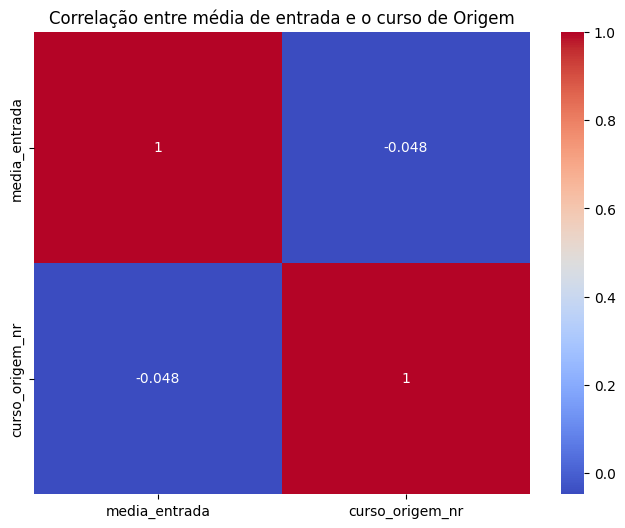

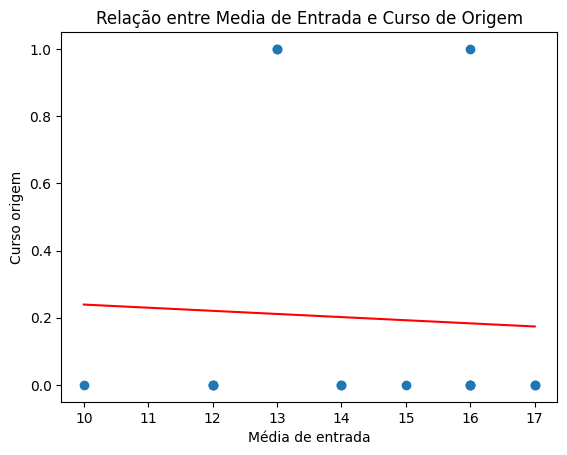

In [79]:
create_heatmap(df_curso[['media_entrada','curso_origem_nr']].corr(), 'Correlação entre média de entrada e o curso de Origem')
create_scatterplot(df_curso['media_entrada'],df_curso['curso_origem_nr'],'Média de entrada','Curso origem','Relação entre Media de Entrada e Curso de Origem')

In [80]:
df_curso.describe().T

,count,mean,std,min,25%,50%,75%,max
nr_aluno,15.0,9.036182e+06,9.434600e+06,200722.0,2003662.5,2021847.0,20191622.0,20221087.0
media_entrada,15.0,1.420000e+01,2.144761e+00,10.0,12.5,14.0,16.0,17.0
curso_concluido,15.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
curso_origem_nr,15.0,2.000000e-01,4.140393e-01,0.0,0.0,0.0,0.0,1.0


In [81]:
for col in df_curso.columns:
    imprimir_quantidade_linhas_com_valores(df_curso,col)
    imprimir_valores_unicos(df_curso,col)
    imprimir_top(df_curso,col)

Existem 15 linhas com valores nao NaN de 15 linhas na coluna nr_aluno.
Os valores da coluna nr_aluno sao: 200722, 200739, 2003485, 2003504, 2003821, 2007103, 2020537, 2021847, 2022848, 20031072, 20191494, 20191750, 20211052, 20211664, 20221087.

nr_aluno com mais aparições é: 200722, 1.
O top 5 nr_aluno:
   nr_aluno  Number
0    200722       1
1    200739       1
2   2003485       1
3   2003504       1
4   2003821       1


O bottom 5 nr_aluno:
  nr_aluno  Number
0   200722       1
1   200739       1
2  2003485       1
3  2003504       1
4  2003821       1

Existem 15 linhas com valores nao NaN de 15 linhas na coluna nome.
Os valores da coluna nome sao:  Alice,  Anne,  Beatriz,  Carla,  Catarina,  Joana,  Maria João,  Nuno,  Patrícia,  Raquel,  Rodrigo.

nome com mais aparições é:  Catarina, 2.
O top 5 nome:
          nome  Number
0     Catarina       2
1        Alice       2
2      Beatriz       2
3         Nuno       2
4   Maria João       1


O bottom 5 nome:
          nome  Number


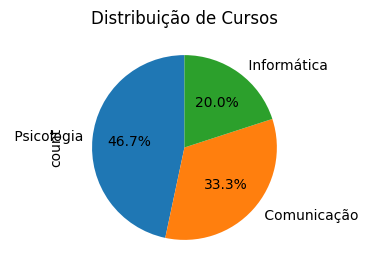

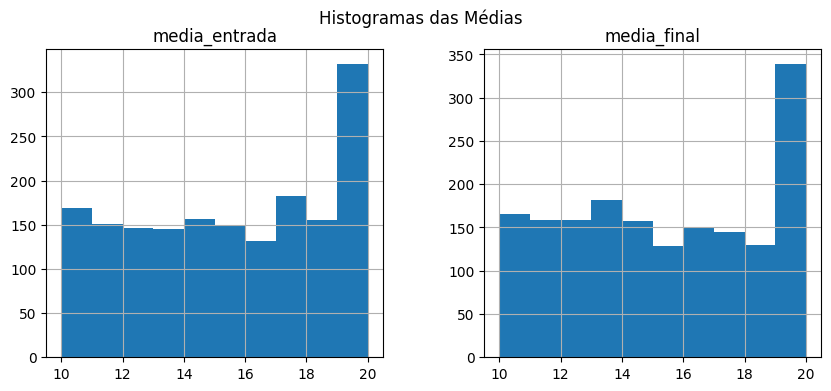

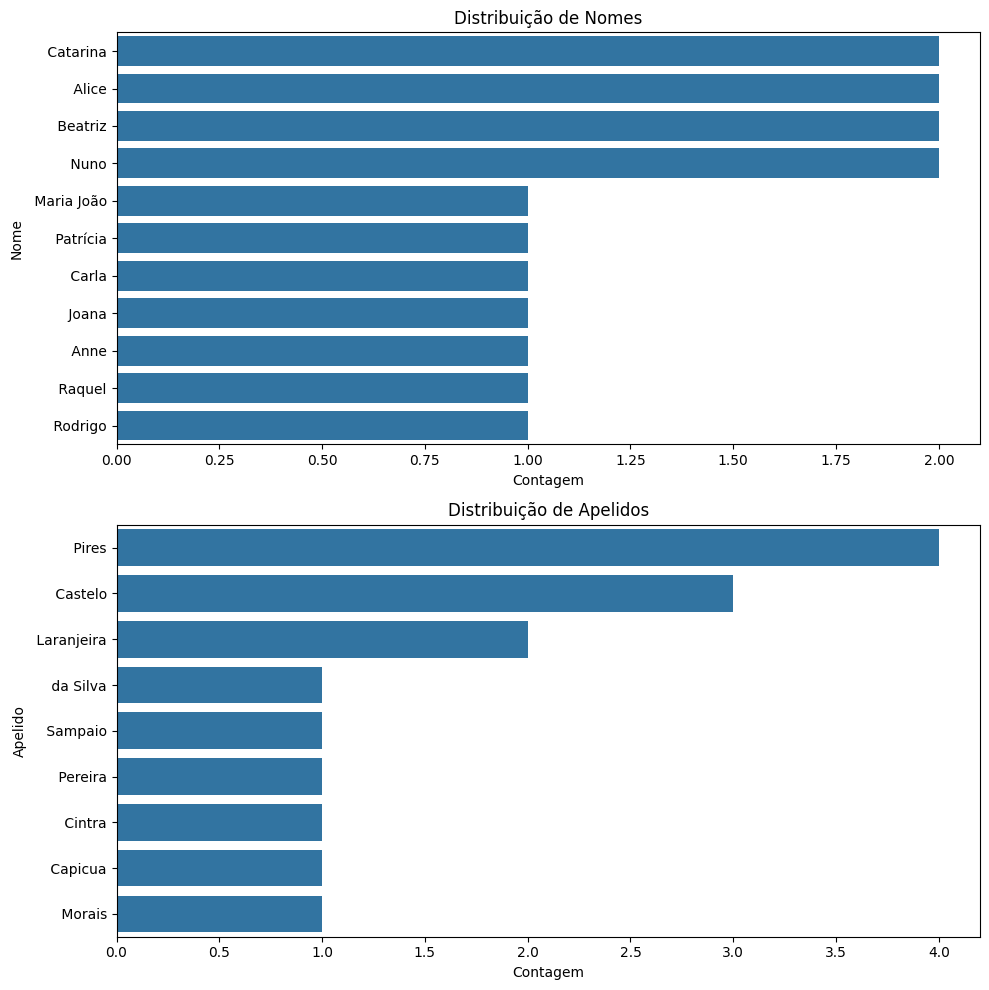

In [82]:
# Contar a frequência de cada curso
curso_counts = df_curso['curso'].value_counts()
curso_counts.plot.pie(autopct='%1.1f%%', figsize=(5, 3), startangle=90)
plt.title('Distribuição de Cursos')
plt.show()

df.hist(column=['media_entrada', 'media_final'], bins=10, figsize=(10, 4))
plt.suptitle('Histogramas das Médias')


nome_counts = df_curso['nome'].value_counts().sort_values(ascending=False)
apelido_counts = df_curso['apelido'].value_counts().sort_values(ascending=False)

# Configurar o tamanho da figura com dois subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

sns.barplot(x=nome_counts.values, y=nome_counts.index, ax=axes[0], order=nome_counts.index)
axes[0].set_title('Distribuição de Nomes')
axes[0].set_xlabel('Contagem')
axes[0].set_ylabel('Nome')

sns.barplot(x=apelido_counts.values, y=apelido_counts.index, ax=axes[1], order = apelido_counts.index)
axes[1].set_title('Distribuição de Apelidos')
axes[1].set_xlabel('Contagem')
axes[1].set_ylabel('Apelido')

# Ajustar layout e mostrar gráfico
plt.tight_layout()
plt.show()

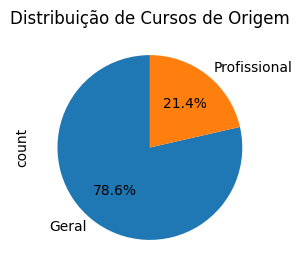

In [83]:
# Contar a frequência de cada curso
course_counts = df_curso['curso_origem'].value_counts()
course_counts.plot.pie(autopct='%1.1f%%', figsize=(5, 3), startangle=90)
plt.title('Distribuição de Cursos de Origem')
plt.show()

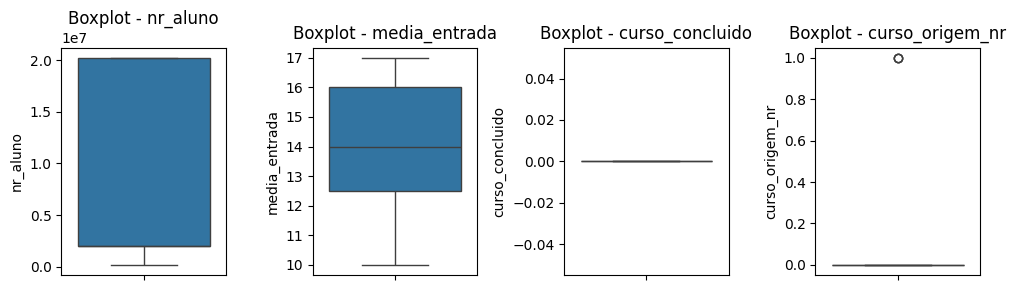

In [84]:
# Cria e mostra os boxplots para vermos outliers
create_boxplots(df_curso)